#### Instructions:  
1. Libraries allowed: **Python basic libraries, numpy, pandas, scikit-learn (only for data processing), pytorch, and ClearML.**
2. Show all outputs.
3. Submit jupyter notebook and a pdf export of the notebook. Check canvas for detail instructions for the report.
4. Below are the questions/steps that you need to answer. Add as many cells as needed.

## Step 4: hyperparameter tuning without learning rate decay
Do hyperparater tuning with ClearML and copy the plots (e.g., parallel coordinates) from ClearML and visualize them here.

In [ ]:
# code
!pip install --quiet git+https://github.com/allegroai/clearml


In [ ]:
%env CLEARML_WEB_HOST=https://app.clear.ml/
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=17JHOPLD9ZBMAU2TI2TFQ7RLG14FDN
%env CLEARML_API_SECRET_KEY=10CWh86rfjTDyv1nyN_G3FX6Z7okJ392eu47WTiMjWzDEGmrTOA1okhYdbiyNpfvmxk

In [ ]:
#HYPERPARAMETER TUNING without learning rate decay

from clearml import Task, Dataset
from clearml.automation import UniformParameterRange, HyperParameterOptimizer
from clearml.automation.optimization import GridSearch
import torch
import os

#Connect to the Base Task
base_task_id = "bfc238eb5cff421bbda782c346b3f643"
task = Task.init(
    project_name="HYPER222",
    task_name="HYPER222",
    task_type="optimizer"
)

# Define Hyperparameter
param_range = [
    UniformParameterRange("General/General/num_layers", min_value=1, max_value=2),
    UniformParameterRange("General/General/num_filters", min_value=4, max_value=8),
    UniformParameterRange("General/SGD/learning_rate", min_value=0.01, max_value=0.1),
    UniformParameterRange("General/SGD/momentum", min_value=0.5, max_value=0.9),
]

# Initialize HyperParameter Optimizer
class CustomGridSearch(GridSearch):
    def post_execution_callback(self, task_id, hyperparameters, objective_value):
        """
        This method will be called after each task completes, allowing you to save the best model.
        """
        task = Task.get_task(task_id=task_id)
        artifacts = task.artifacts
        if "model" in artifacts:
            model_path = artifacts["model"].get_local_copy()
            print(f"Model from task {task_id} downloaded: {model_path}")
        else:
            print(f"No model found for task {task_id}")

optimizer = HyperParameterOptimizer(
    base_task_id=base_task_id,
    hyper_parameters=param_range,
    objective_metric_title="Validation",
    objective_metric_series="Loss",
    objective_metric_goal="min",
    optimizer_class=CustomGridSearch,
    max_iteration=1,
    total_max_jobs=5,
    pool_period_min=3,
)

# Start Hyperparameter Tuning
optimizer.start()

# Wait for completion
optimizer.wait()

# Retrieve the Best Model for furthur use
best_task = optimizer.get_best_task()
if best_task:
    best_task_id = best_task.id
    print(f"Best task ID: {best_task_id}")
    best_model_artifact = best_task.artifacts["model"].get_local_copy()
    print(f"Best model saved locally at: {best_model_artifact}")

optimizer.stop()


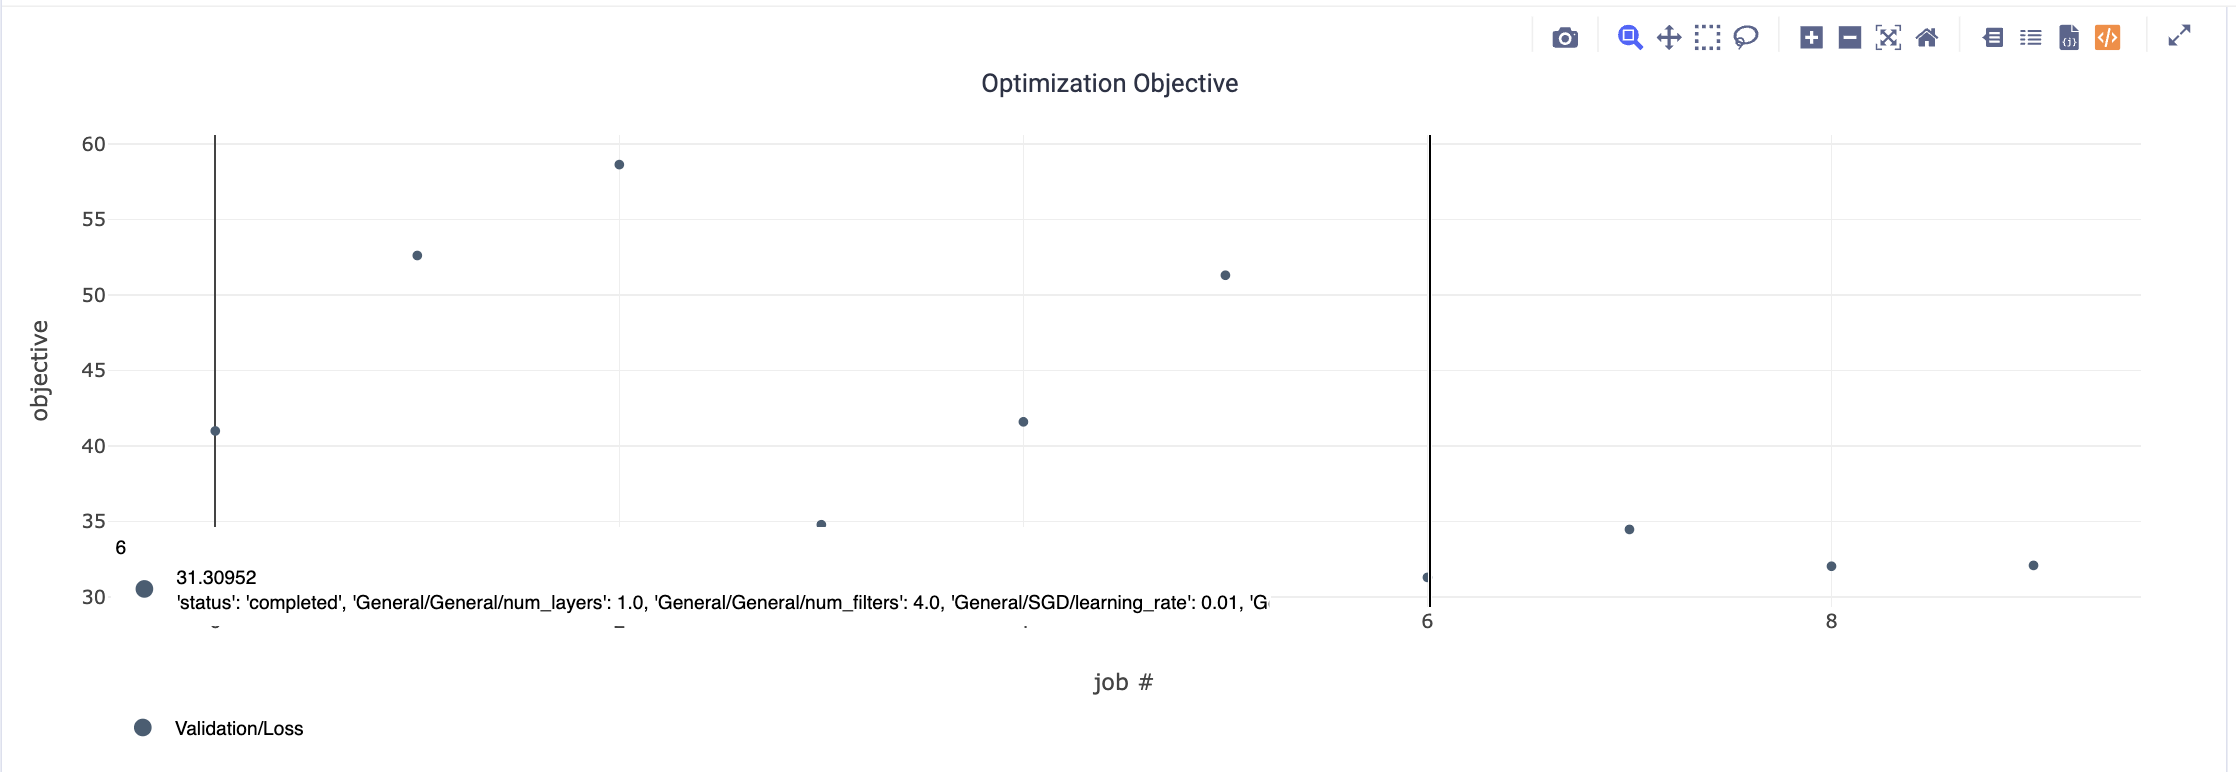

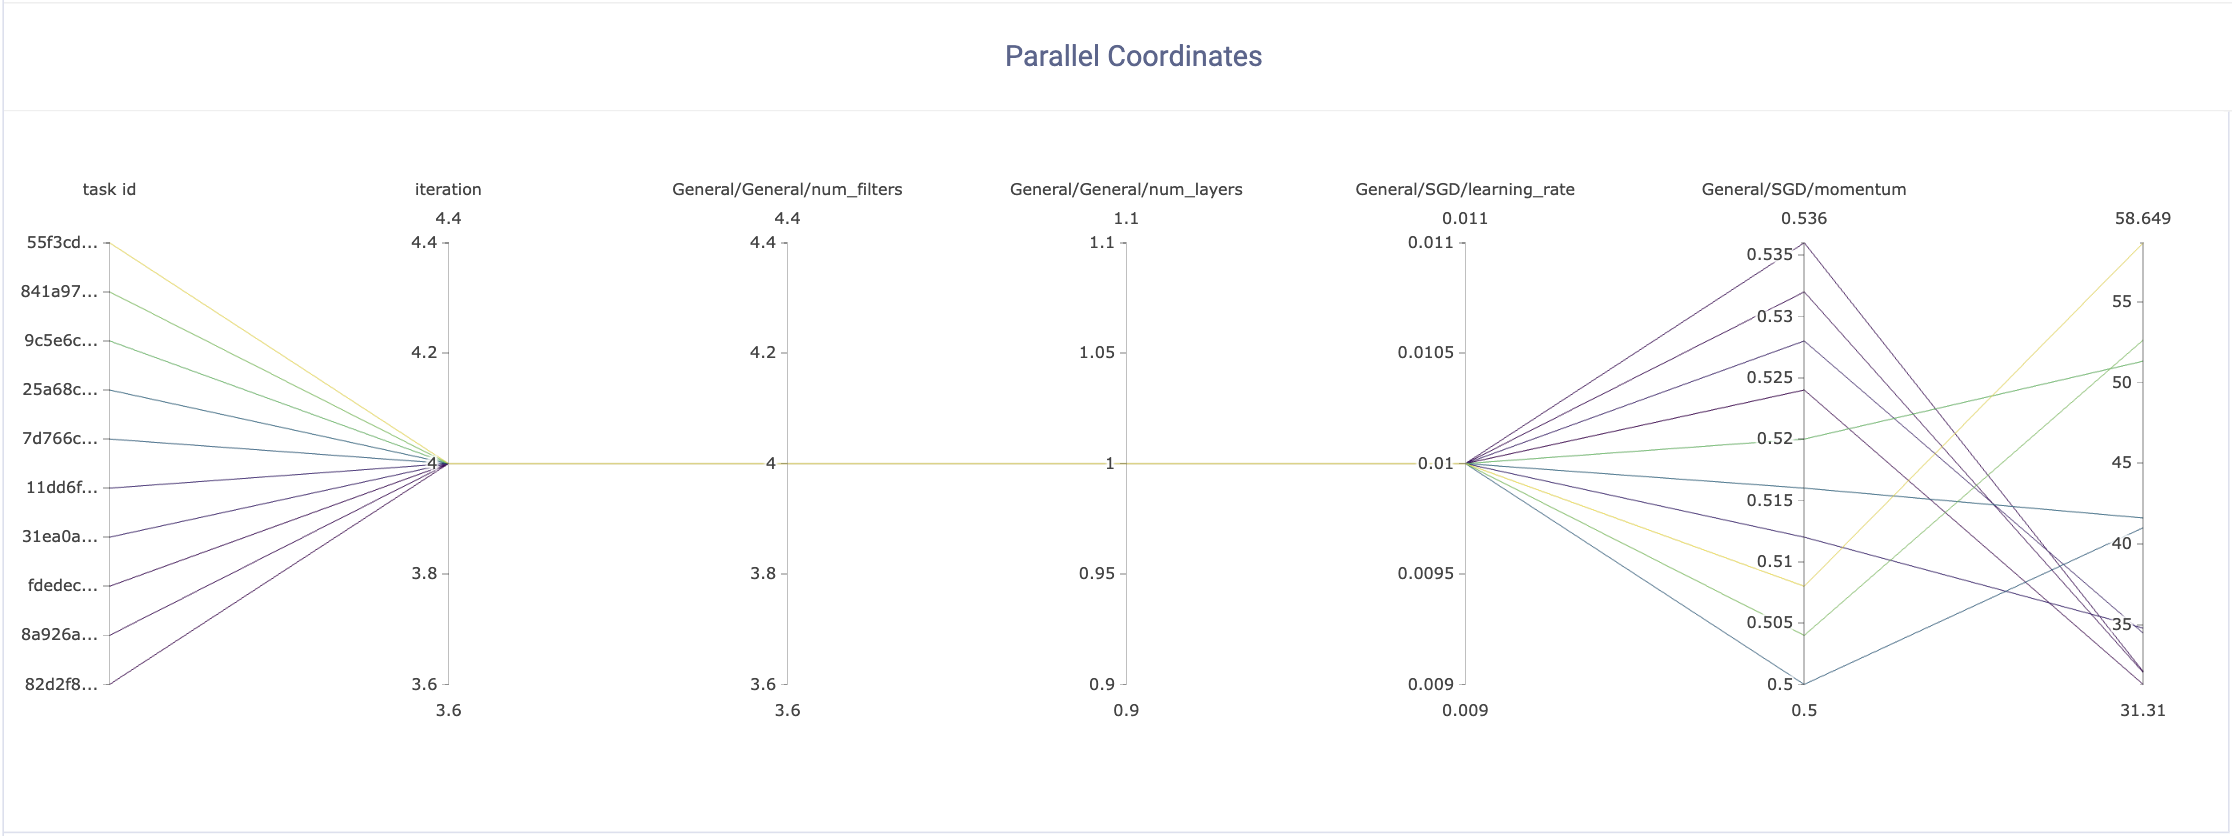

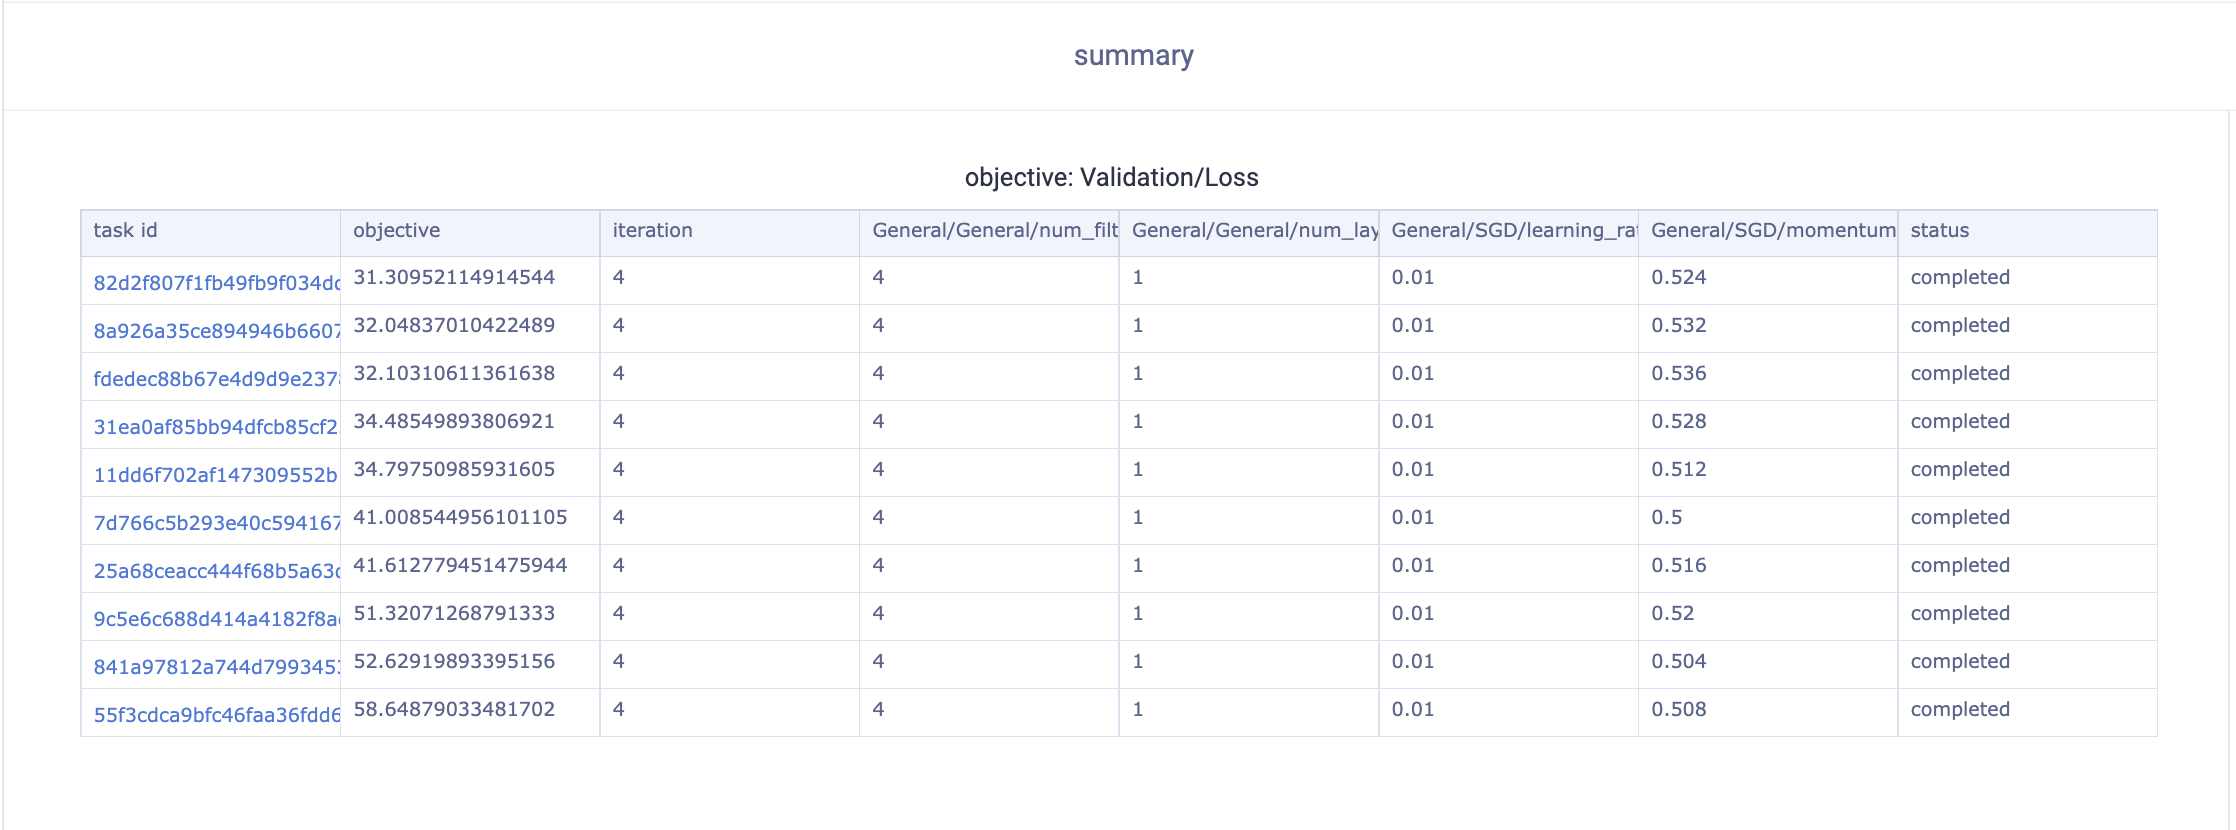

## Step 5: hyperparameter tuning with learning rate decay
Do hyperparater tuning with ClearML and copy the plots (e.g., parallel coordinates) from ClearML and visualize them here.

In [ ]:
#HYPERPARAMETER TUNING with learning rate decay

from clearml import Task, Dataset
from clearml.automation import UniformParameterRange, HyperParameterOptimizer
from clearml.automation.optimization import GridSearch

# Connect to the Base Task
base_task_id = "3596afb9464d4fc694b49e60c38ce34c"
task = Task.init(
    project_name="99999",
    task_name="99999",
    task_type="optimizer"
)

# Define Hyperparameter Search Space
param_range = [
    UniformParameterRange("General/General/num_layers", min_value=1, max_value=2),
    UniformParameterRange("General/General/num_filters", min_value=4, max_value=8),
    UniformParameterRange("General/SGD/learning_rate", min_value=0.01, max_value=0.1),
    UniformParameterRange("General/SGD/momentum", min_value=0.5, max_value=0.9),
    UniformParameterRange("General/SGD/learning_rate_decay", min_value=0.85, max_value=0.95),  # New parameter
]
# Initialize HyperParameter Optimizer
class CustomGridSearch(GridSearch):
    def post_execution_callback(self, task_id, hyperparameters, objective_value):
        """
        This method will be called after each task completes, allowing you to save the best model.
        """
        task = Task.get_task(task_id=task_id)
        artifacts = task.artifacts
        if "model" in artifacts:
            model_path = artifacts["model"].get_local_copy()
            print(f"Model from task {task_id} downloaded: {model_path}")
        else:
            print(f"No model found for task {task_id}")

optimizer = HyperParameterOptimizer(
    base_task_id=base_task_id,
    hyper_parameters=param_range,
    objective_metric_title="Validation",
    objective_metric_series="Loss",
    objective_metric_goal="min",
    optimizer_class=GridSearch,
    max_iteration=1,
    total_max_jobs=5,
    pool_period_min=3,
)

# Start Hyperparameter Tuning
optimizer.start()

# Wait for completion
optimizer.wait()

# Retrieve the Best Model for furthur use
best_task = optimizer.get_best_task()
if best_task:
    best_task_id = best_task.id
    print(f"Best task ID: {best_task_id}")
    best_model_artifact = best_task.artifacts["model"].get_local_copy()
    print(f"Best model saved locally at: {best_model_artifact}")

optimizer.stop()

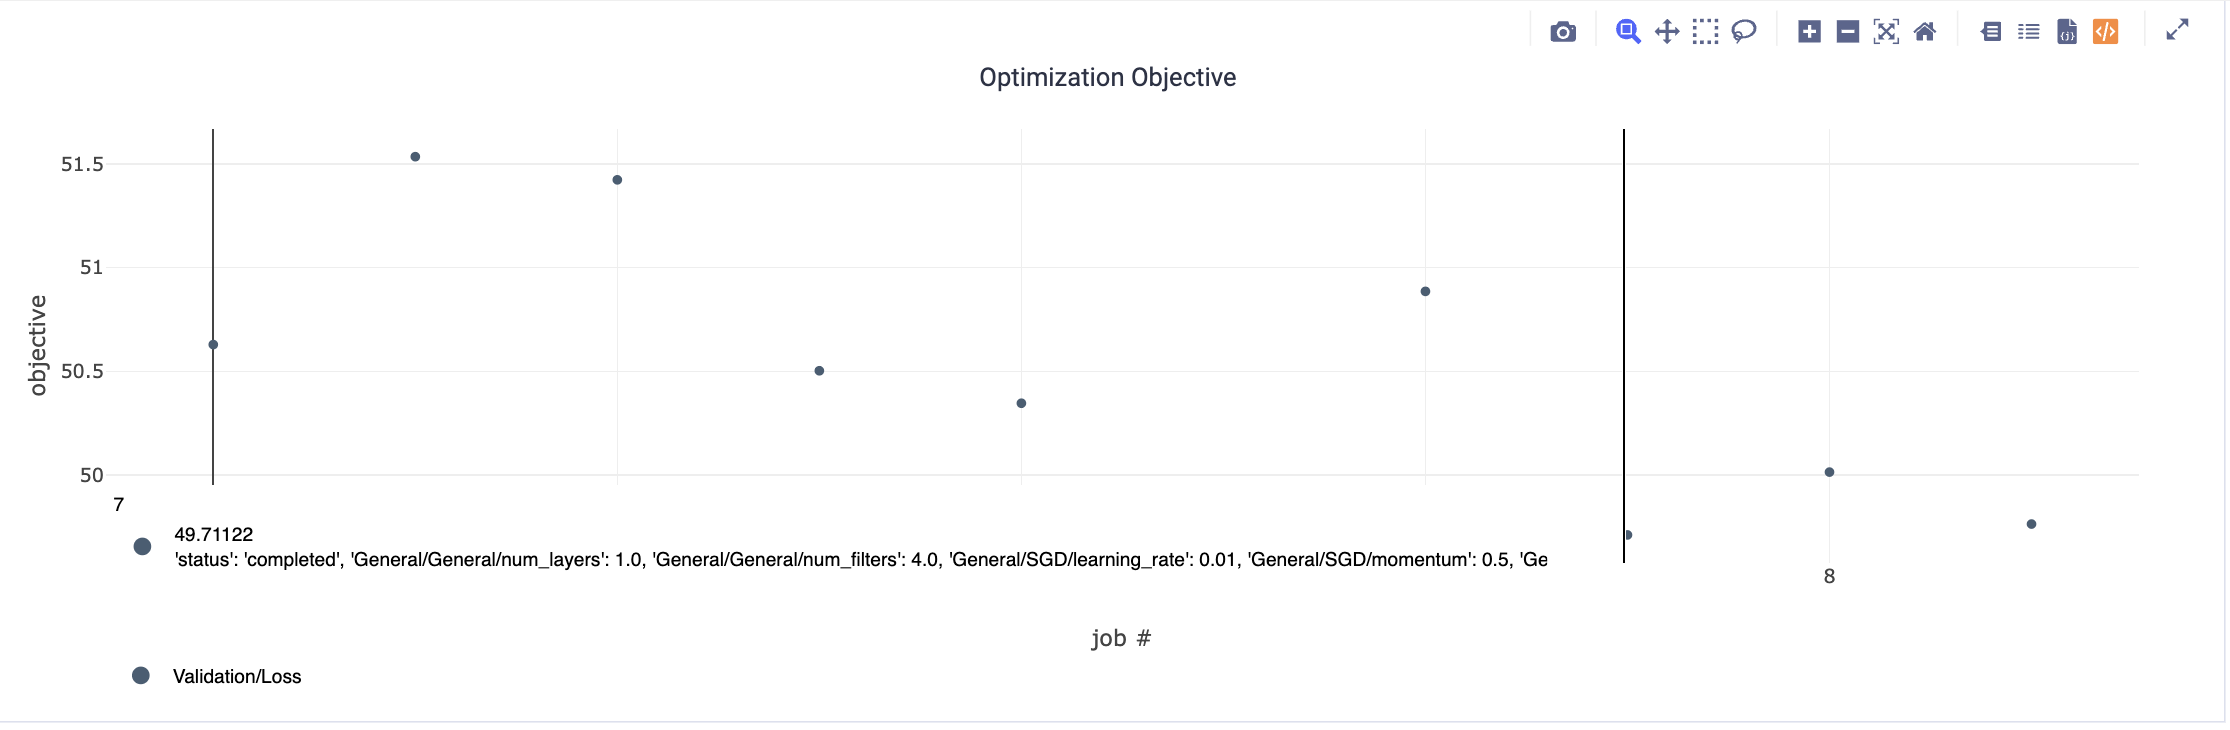

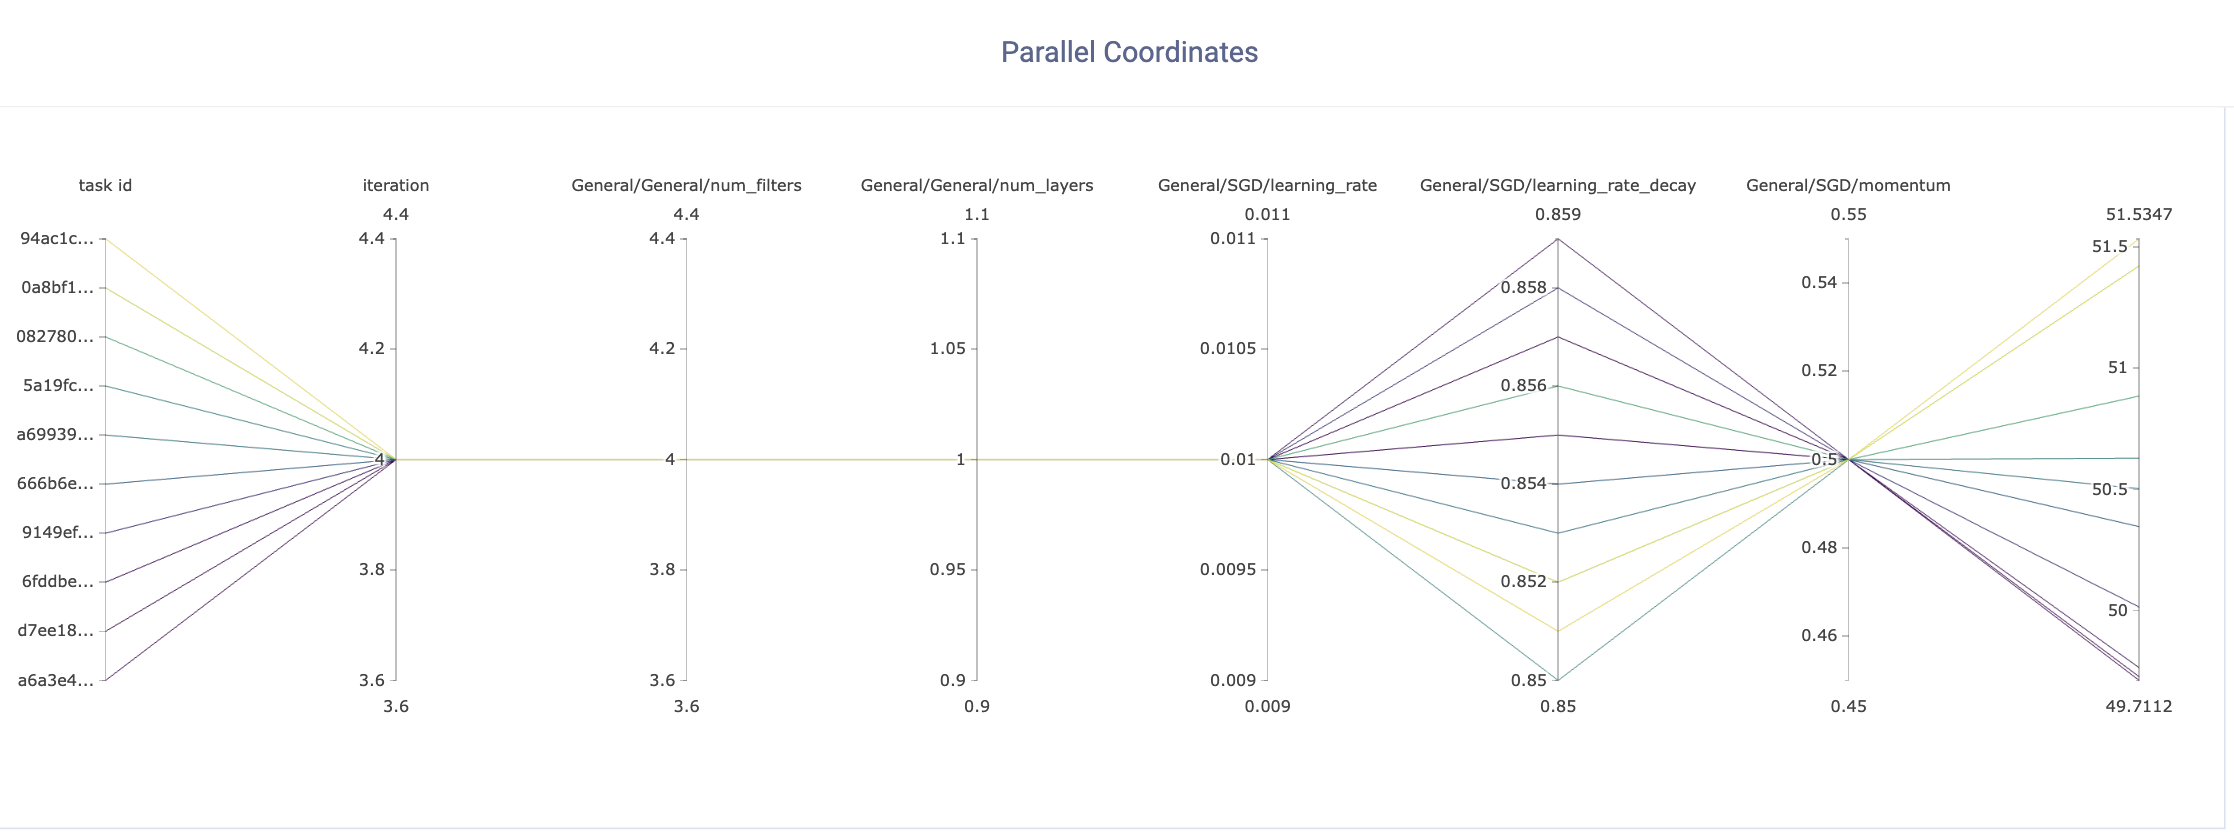

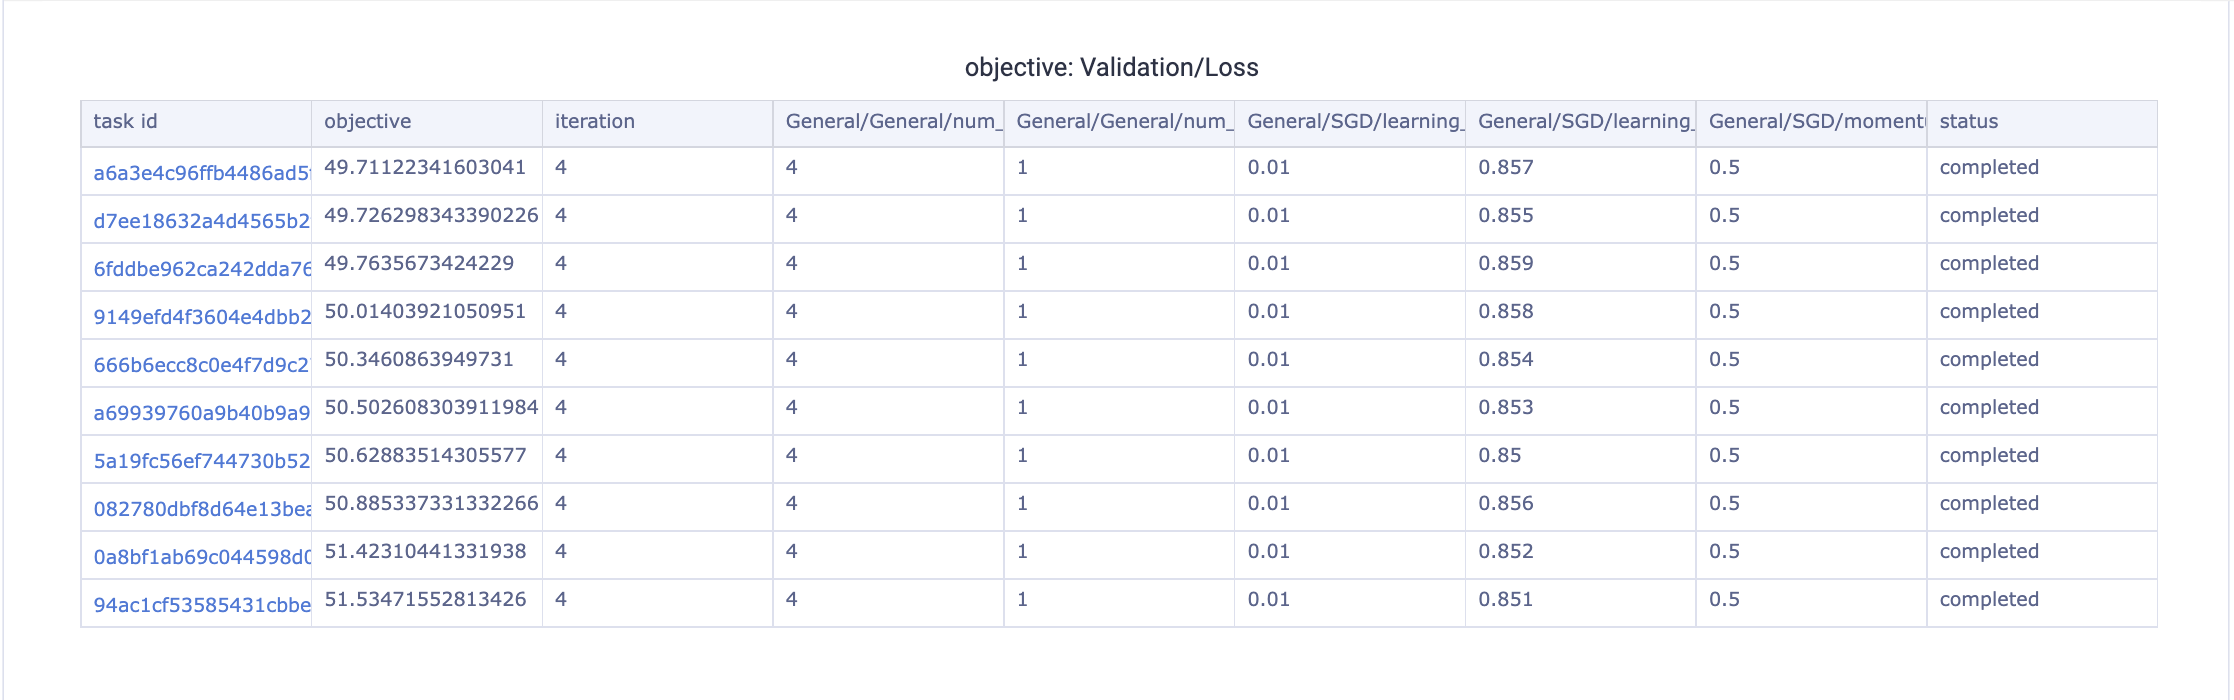

## Step 6: Evaluation
Evaluate the best model on test dataset and report accuracy, precision, recall, and F1 score.

In [ ]:
!pip install --quiet git+https://github.com/allegroai/clearml


  Preparing metadata (setup.py) ... done


In [ ]:
%env CLEARML_WEB_HOST=https://app.clear.ml/
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=17JHOPLD9ZBMAU2TI2TFQ7RLG14FDN
%env CLEARML_API_SECRET_KEY=10CWh86rfjTDyv1nyN_G3FX6Z7okJ392eu47WTiMjWzDEGmrTOA1okhYdbiyNpfvmxk

env: CLEARML_WEB_HOST=https://app.clear.ml/
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=17JHOPLD9ZBMAU2TI2TFQ7RLG14FDN
env: CLEARML_API_SECRET_KEY=10CWh86rfjTDyv1nyN_G3FX6Z7okJ392eu47WTiMjWzDEGmrTOA1okhYdbiyNpfvmxk


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Define the Model Class
class SimpleCNN(nn.Module):
    def __init__(self, num_layers, num_filters, num_classes):
        super(SimpleCNN, self).__init__()
        self.layers = nn.ModuleList()
        in_channels = 3
        for _ in range(num_layers):
            self.layers.append(nn.Conv2d(in_channels, num_filters, kernel_size=3, stride=1, padding=1))
            self.layers.append(nn.ReLU())
            self.layers.append(nn.MaxPool2d(kernel_size=2))
            in_channels = num_filters
        fc_input_size = num_filters * (224 // (2 ** num_layers)) ** 2
        self.fc = nn.Linear(fc_input_size, num_classes)

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Prepare the Data
test_dir = "/content/drive/MyDrive/Car_Brand_Logos/Test"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

test_dataset = ImageFolder(test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Match Model Hyperparameters to Trained Model
num_layers = 2
num_filters = 8
num_classes = len(test_dataset.classes)

# Create the Model
model = SimpleCNN(num_layers=num_layers, num_filters=num_filters, num_classes=num_classes)

# Load the Model Weights
model_path = '/content/drive/MyDrive/Car_Brand_Logos/none/trained_model.pth'
state_dict = torch.load(model_path)

# Adjust for Key Mismatches if Necessary
model.load_state_dict(state_dict, strict=False)

model.eval()

# Evaluate the Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Report Metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average="weighted")
recall = recall_score(all_labels, all_preds, average="weighted")
f1 = f1_score(all_labels, all_preds, average="weighted")

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

<ipython-input-4-749f657d8704>:52: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path)


Evaluation Metrics:
Accuracy: 0.3500
Precision: 0.3468
Recall: 0.3500
F1 Score: 0.3308


## Step 7: Analysis
Provide a complete analysis of the whole process.

Answer:

* The purpose of this project was to create and test a neural network for image classification using car brand logos. Two approaches were explored: one without learning rate decay and another with learning rate decay.
* The model without learning rate decay performed better, showing slightly higher accuracy and generalization.
Introducing learning rate decay did not significantly improve performance, possibly due to the small number of epochs (5), which limited the decay's effect.
* The parallel coordinates plots from ClearML provided insights into the influence of hyperparameter.
* Despite strong training results, both models struggled with unseen data. This
is a classic sign of overfitting, where the model learns patterns specific to the training set rather than generalizable features.

*   The car brand logos dataset may lack the complexity needed to challenge the model in meaningful ways, leading to a plateau in test performance. Due to lack of resources we have to take less possible parameter for our system to run.
* Both models used a simple convolutional neural network (CNN) with only one layer of convolution and pooling. While suitable for experimentation, this structure might not capture nuanced patterns in image data, particularly for a task like logo recognition, where fine details matter.





Two approaches to hyperparameter tuning were employed using ClearML:
Without Learning Rate Decay:
* The best-performing model parameters were:
1. num_layers: 1.0
2. num_filters: 4.0
3. learning_rate: 0.01
4. momentum: 0.524
5. weight_decay: 0.0005
* Results: Achieved Loss = 31.3095 and Accuracy = 94.62% on training data.

With Learning Rate Decay:

* The best model configuration:
1. num_layers: 1.0
2. num_filters: 4.0
3. learning_rate: 0.01
4. momentum: 0.5
5. learning_rate_decay: 0.857
6. weight_decay: 0.0005
* Results: Achieved Loss = 49.7112 and Accuracy = 92.38% on training data.

Taking the best model, we implement it on test dataset and find accuracy, precision, recall, and F1 score.
* Evaluation Metrics:
* Accuracy: 0.3500
* Precision: 0.3468
* Recall: 0.3500
* F1 Score: 0.3308